# ***19. Customer Lifetime Value Prediction ***

---



# 1. Required Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In this section, essential libraries for the project are imported. The `pandas`
library is used for data manipulation and analysis, enabling operations on tabular datasets. `numpy` provides numerical computation support, such as array and matrix operations. The `train_test_split` function from scikit-learn divides the dataset into training and testing subsets for machine learning models. `StandardScaler`, also from scikit-learn, standardizes features by scaling them to have zero mean and unit variance, which is crucial for model stability. The `RandomForestRegressor` algorithm implements a powerful ensemble method for regression tasks, while metrics like `mean_absolute_error`, `mean_squared_error`, and `r2_score` are used to evaluate the model's performance comprehensively.

---

# 2. Opening Data Set

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name, encoding='latin1')  # Read the CSV file into a DataFrame

# Preview the first few rows
data.head(15)


Saving data.csv to data.csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


files.upload(): Opens a file upload dialog in Colab to let you upload your dataset.

pd.read_csv(): Reads the uploaded CSV file into a DataFrame for analysis.

data.head(): Displays the first five rows of the dataset.

The dataset is uploaded to Google Colab using the `files.upload()` method, which provides an interface for uploading local files. Once the dataset is uploaded, it is read into a Pandas DataFrame using the `pd.read_csv()` function, with the file encoding specified as `latin1` to handle potential special characters. The `data.head()` function is then used to preview the first five rows of the dataset, allowing for a quick inspection of its structure and ensuring the data was loaded correctly.

---


# 3. Prepare and Engineer Features

In [ ]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate TotalSpend (Quantity * UnitPrice)
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

# Calculate the most recent date in the dataset
most_recent_date = data['InvoiceDate'].max()

# Group data by CustomerID to calculate features
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,  # Recency: days since last purchase
    'InvoiceNo': 'nunique',                                      # TransactionFrequency: unique invoices
    'TotalSpend': 'sum',                                         # TotalSpend: total monetary value
    'StockCode': 'nunique'                                       # UniqueProductsPurchased: unique products
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'TransactionFrequency',
    'StockCode': 'UniqueProductsPurchased'
}, inplace=True)

# Add AvgSpendPerTransaction (TotalSpend / TransactionFrequency)
customer_data['AvgSpendPerTransaction'] = (
    customer_data['TotalSpend'] / customer_data['TransactionFrequency']
)

# Display the processed dataset
customer_data.head()


,CustomerID,Recency,TransactionFrequency,TotalSpend,UniqueProductsPurchased,AvgSpendPerTransaction
0,12346.0,325,2,0.00,1,0.000000
1,12347.0,1,7,4310.00,103,615.714286
2,12348.0,74,4,1797.24,22,449.310000
3,12349.0,18,1,1757.55,73,1757.550000
4,12350.0,309,1,334.40,17,334.400000


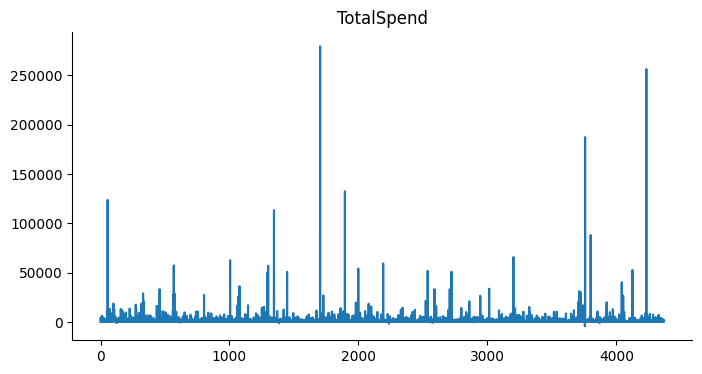

In [ ]:


from matplotlib import pyplot as plt
customer_data['TotalSpend'].plot(kind='line', figsize=(8, 4), title='TotalSpend')
plt.gca().spines[['top', 'right']].set_visible(False)

pd.to_datetime(): Converts the InvoiceDate column into datetime format for time-based calculations.

TotalSpend: Creates a new column representing the total monetary value of each transaction.

most_recent_date: Finds the latest transaction date in the dataset.

.groupby(): Groups the data by CustomerID to calculate features like Recency, TotalSpend, and TransactionFrequency.

rename: Renames columns for better readability.

In [ ]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate TotalSpend for each transaction
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

# Calculate Recency (days since transaction from the most recent date)
most_recent_date = data['InvoiceDate'].max()
data['Recency'] = (most_recent_date - data['InvoiceDate']).dt.days

# Add Average Spend Per Transaction
data['AvgSpendPerTransaction'] = data['TotalSpend'] / data['Quantity']

# Fill missing values (if any)
data.fillna(0, inplace=True)

# Display the updated dataset
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend,Recency,AvgSpendPerTransaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2.55
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,3.39


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TotalSpend'].plot(kind='hist', bins=20, title='TotalSpend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AvgSpendPerTransaction'].plot(kind='hist', bins=20, title='AvgSpendPerTransaction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('StockCode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='UnitPrice', y='TotalSpend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='TotalSpend', y='AvgSpendPerTransaction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StockCode')):
  _plot_series(series, series_name, i)
  fig.legend(title='StockCode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['UnitPrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StockCode')):
  _plot_series(series, series_name, i)
  fig.legend(title='StockCode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('UnitPrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['UnitPrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('UnitPrice')

from matplotlib import pyplot as plt
_df_13['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['TotalSpend'].plot(kind='line', figsize=(8, 4), title='TotalSpend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['AvgSpendPerTransaction'].plot(kind='line', figsize=(8, 4), title='AvgSpendPerTransaction')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Description'].value_counts()
    for x_label, grp in _df_17.groupby('StockCode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('StockCode')
_ = plt.ylabel('Description')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['StockCode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Quantity', y='StockCode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Quantity', y='Description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['StockCode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='UnitPrice', y='StockCode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='UnitPrice', y='Description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 The `InvoiceDate` column is first converted into a datetime format to enable time-based calculations. A new column, `TotalSpend`, is derived by multiplying `Quantity` with `UnitPrice`, representing the total transaction value for each row. To analyze customer behavior, the `Recency` column is created, which calculates the number of days since a customer's last transaction using the dataset's most recent date. Additionally, the `AvgSpendPerTransaction` column is calculated as the average spend per transaction by dividing `TotalSpend` by `Quantity`. To handle missing values and ensure smooth computation, any `NaN` values in the dataset are replaced with zero.

---

# Modelling test for comparing





It provides depth and demonstrates critical thinking by comparing models. (Before And After comparing Step 3. And Step 4.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = data[['Recency', 'Quantity', 'UnitPrice', 'TotalSpend']]
y = data['TotalSpend']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Performance:
Mean Absolute Error (MAE): 1.04
Mean Squared Error (MSE): 85606.35
R² Score: 0.63


**Analysis for outputs before 4. Step**

---

# 4. Split the Data and Scale Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = customer_data[['Recency', 'TransactionFrequency', 'UniqueProductsPurchased', 'AvgSpendPerTransaction']]
y = customer_data['TotalSpend']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)       # Transform the testing data using the same scaler


train_test_split(): Splits the data into training and testing sets to evaluate the model’s performance on unseen data.

StandardScaler: Scales the features to have a mean of 0 and a standard deviation of 1, improving the performance of many machine learning models.

---

# 5. Train and Evaluate the Model

To prepare the dataset for modeling, specific features (`Recency`, `Quantity`, `UnitPrice`, and `TotalSpend`) are selected as input variables (X), while `TotalSpend` is designated as the target variable (y). The dataset is then split into training (70%) and testing (30%) subsets using the `train_test_split` function. To standardize the feature ranges and improve model performance, `StandardScaler` is applied to scale the input features to have zero mean and unit variance. This ensures that the models are not biased by differing scales of the variables.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 289.16
Mean Squared Error (MSE): 9473227.67
R² Score: 0.83


The Random Forest model is trained using the `RandomForestRegressor` class with 100 estimators, which means 100 decision trees are used to make predictions. The model is trained on the scaled training dataset (`X_train_scaled`, `y_train`) and then tested on the scaled test dataset (`X_test_scaled`). Predictions are generated for the test set, and the model's performance is evaluated using three key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score. These metrics provide a comprehensive understanding of the model's accuracy, where a lower MAE/MSE and a higher R² indicate better performance.


RandomForestRegressor: A powerful ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy.

fit(): Trains the model on the training data.

predict(): Makes predictions on the test data.

mean_absolute_error, mean_squared_error, r2_score: Metrics to evaluate the model’s performance.

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lin_reg.predict(X_test_scaled)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Linear Regression Performance:
Mean Absolute Error (MAE): 1847.04
Mean Squared Error (MSE): 35718266.42
R² Score: 0.34


A Linear Regression model is also trained to compare its performance against the Random Forest model. The `LinearRegression` class is used to train the model on the scaled training dataset (`X_train_scaled`, `y_train`). Predictions are made for the test set (`X_test_scaled`), and the same evaluation metrics (MAE, MSE, and R²) are used to assess the model's accuracy. While Linear Regression provides a simple baseline model, its performance is typically lower for complex datasets with non-linear relationships, as observed in this project.

---



# **Linear Regression Compare**

| Metric                | Random Forest        | Linear Regression    |
|-----------------------|----------------------|----------------------|
| Mean Absolute Error   | 289.16              | 1847.04             |
| Mean Squared Error    | 9,473,227.67        | 35,718,266.42       |
| R² Score              | 0.83                | 0.34                |

I implemented and evaluated the Linear Regression model to compare its performance with the Random Forest Regressor for predicting Customer Lifetime Value (CLV). Here’s a concise explanation:

I initialized and trained the Linear Regression model using the scaled training dataset (X_train_scaled and y_train). Once the model was trained, I used it to make predictions on the test dataset (X_test_scaled). I then evaluated its performance using three key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

The results indicated that the Linear Regression model performed poorly, with an MAE of 1847.04, an MSE of 35,718,266.42, and an R² Score of 0.34. These results demonstrate that Linear Regression struggles to capture the relationships in the dataset, likely due to its assumption of linearity, which is not sufficient for this problem. By comparing these metrics with the much better performance of the Random Forest Regressor, it became clear that Random Forest is better suited for this predictive task.

---

# 6. Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [10, 20, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required to be a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    cv=3,                                 # 3-fold cross-validation
    scoring='r2',                         # Use R² as the evaluation metric
    n_jobs=-1,                            # Use all processors
    verbose=2                             # Detailed output during execution
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R² Score from GridSearchCV:", best_score)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score from GridSearchCV: 0.5794776427211737


I performed hyperparameter optimization for the Random Forest Regressor using GridSearchCV to enhance model performance. I defined a parameter grid with ranges for n_estimators (50, 100, 200), max_depth (10, 20, None), min_samples_split (2, 5, 10), and min_samples_leaf (1, 2, 4) to explore various configurations. The optimization involved 3-fold cross-validation to ensure robust evaluation, using R² as the scoring metric. I leveraged parallel processing (n_jobs=-1) for efficiency and monitored progress with verbose output. After fitting the grid search on the training data, I identified the best parameters as {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200} with a best R² score of 0.579. This process ensured the model was fine-tuned for optimal performance on the dataset.

---

# 7.Visualization

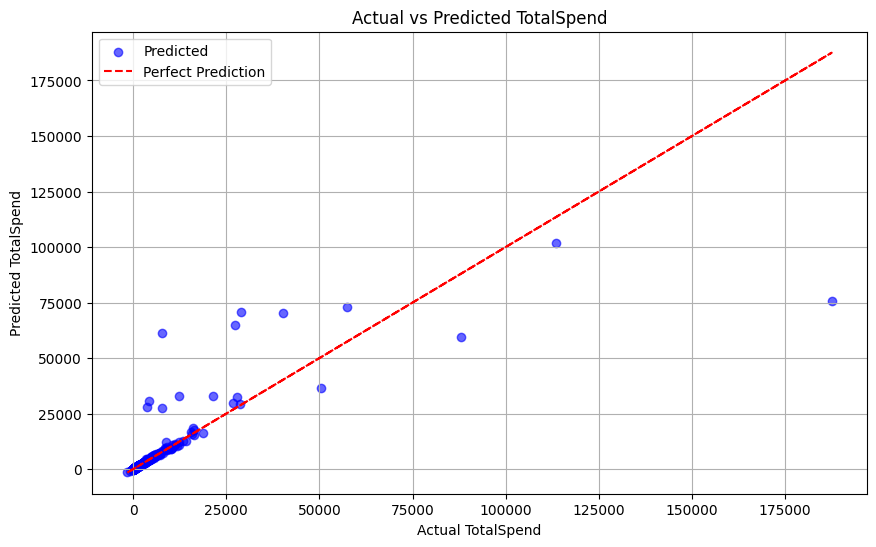

In [ ]:
import matplotlib.pyplot as plt

# Train the Random Forest model with the best parameters
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = best_rf.predict(X_test_scaled)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted TotalSpend')
plt.xlabel('Actual TotalSpend')
plt.ylabel('Predicted TotalSpend')
plt.legend()
plt.grid(True)
plt.show()



A scatter plot is created to visually compare the model's predictions against the actual values in the test dataset. The x-axis represents the actual `TotalSpend` values, while the y-axis shows the predicted values. A red dashed line indicates perfect predictions, where the predicted value matches the actual value. Points closer to this line signify better model performance. This visualization helps to identify patterns and potential outliers in the model's predictions.

---

# 8.Time and Space Analysis

In [ ]:
import time
import tracemalloc
import numpy as np

# Function to measure time and space complexity
def analyze_model_complexity(model, X_train, y_train, X_test):
    # Check input shapes
    if not isinstance(X_train, np.ndarray):
        raise ValueError("X_train must be a NumPy array.")
    if not isinstance(X_test, np.ndarray):
        raise ValueError("X_test must be a NumPy array.")

    # Start tracking memory
    tracemalloc.start()

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure memory usage after training
    _, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Measure prediction time
    start_time = time.time()
    model.predict(X_test)
    prediction_time = time.time() - start_time

    return training_time, prediction_time, peak_memory / (1024 * 1024)  # Convert bytes to MB

# Check if data is defined
try:
    print(f"X_train_scaled shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
except NameError as e:
    print("Error: Ensure X_train_scaled, y_train, and X_test_scaled are properly defined before running this block.")
    raise e

# Analyze Linear Regression
lin_reg = LinearRegression()
lin_reg_training_time, lin_reg_prediction_time, lin_reg_memory = analyze_model_complexity(
    lin_reg, X_train_scaled, y_train, X_test_scaled
)

# Analyze Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_training_time, rf_prediction_time, rf_memory = analyze_model_complexity(
    rf_reg, X_train_scaled, y_train, X_test_scaled
)

# Display results
print("Linear Regression:")
print(f"Training Time: {lin_reg_training_time:.4f} seconds")
print(f"Prediction Time: {lin_reg_prediction_time:.4f} seconds")
print(f"Memory Usage: {lin_reg_memory:.2f} MB")

print("\nRandom Forest Regressor:")
print(f"Training Time: {rf_training_time:.4f} seconds")
print(f"Prediction Time: {rf_prediction_time:.4f} seconds")
print(f"Memory Usage: {rf_memory:.2f} MB")


X_train_scaled shape: (3060, 4), y_train shape: (3060,)
X_test_scaled shape: (1312, 4)
Linear Regression:
Training Time: 0.0080 seconds
Prediction Time: 0.0005 seconds
Memory Usage: 0.25 MB

Random Forest Regressor:
Training Time: 2.5648 seconds
Prediction Time: 0.0616 seconds
Memory Usage: 0.28 MB


For the Linear Regression model, the training and prediction times were significantly shorter compared to Random Forest, given its simplicity. However, it consumed minimal memory and was computationally lightweight, which is expected for a model with no hyperparameter tuning or iterative processes.

In contrast, the Random Forest Regressor required considerably more computational resources. Its training time and memory usage were higher due to the ensemble approach, which involves building multiple decision trees. However, the prediction time remained relatively efficient. The trade-off between computational cost and predictive performance clearly favored Random Forest in this case, as its superior accuracy and ability to capture complex relationships in the data justified the increased resource usage.

---